In [1]:
# testing geoparquet
# geopackages are taking 4 ever to write

# Write to geoparquet vs write to geopackage

In [2]:
pip install pyogrio

Note: you may need to restart the kernel to use updated packages.


In [3]:
import geopandas as gpd
import os
import pandas as pd
import matplotlib.pyplot as plt
import timeit
import seaborn as sns
from matplotlib.ticker import MaxNLocator


path_to_file = "/home/jovyan/geobench/data/CASCADES_N_20200501_20201201_L20_S20.gpkg"
bench_dir = "/home/jovyan/geobench/data"

df = gpd.read_file(path_to_file, engine="pyogrio")

def write_to_parquet():
    df.to_parquet(os.path.join(bench_dir, 'test.parquet'))

def read_from_parquet():
    gpd.read_parquet(os.path.join(bench_dir, 'test.parquet'))

def write_with_pyogrio():
    df.to_file(os.path.join(bench_dir, 'test.gpkg'), driver='GPKG', engine="pyogrio")
    
def write_without_pyogrio():
    df.to_file(os.path.join(bench_dir, 'test.gpkg'), driver='GPKG')

def read_with_pyogrio():
    gpd.read_file(os.path.join(bench_dir, 'test.gpkg'), engine="pyogrio")

def read_without_pyogrio():
    gpd.read_file(os.path.join(bench_dir, 'test.gpkg'))

number_of_repeats = 5

print('Benchmarking parquet write...')
parquet_write_time = timeit.timeit(write_to_parquet, number=number_of_repeats) / number_of_repeats
print('Benchmarking parquet read...')
parquet_read_time = timeit.timeit(read_from_parquet, number=number_of_repeats) / number_of_repeats

print('Benchmarking GeoPackage write with pyogrio...')
gpkg_write_time_pyogrio = timeit.timeit(write_with_pyogrio, number=number_of_repeats) / number_of_repeats
print('Benchmarking GeoPackage read with pyogrio...')
gpkg_read_time_pyogrio = timeit.timeit(read_with_pyogrio, number=number_of_repeats) / number_of_repeats

print('Benchmarking GeoPackage write without pyogrio...')
gpkg_write_time_without_pyogrio = timeit.timeit(write_without_pyogrio, number=number_of_repeats) / number_of_repeats
print('Benchmarking GeoPackage read without pyogrio...')
gpkg_read_time_without_pyogrio = timeit.timeit(read_without_pyogrio, number=number_of_repeats) / number_of_repeats

/tmp/ipykernel_988/91691533.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


Benchmarking parquet write...
Benchmarking parquet read...
Benchmarking GeoPackage write with pyogrio...
Benchmarking GeoPackage read with pyogrio...
Benchmarking GeoPackage write without pyogrio...
Benchmarking GeoPackage read without pyogrio...


In [33]:
# Storing results in a dataframe for writing
write_results = {
    'Format': ['parquet', 'gpkg (pyogrio)', 'gpkg'],
    'Average Write Time (s)': [parquet_write_time, gpkg_write_time_pyogrio, gpkg_write_time_without_pyogrio]
}
write_df = pd.DataFrame(write_results)

# Storing results in a dataframe for reading
read_results = {
    'Format': ['parquet', 'gpkg (pyogrio)', 'gpkg'],
    'Average Read Time (s)': [parquet_read_time, gpkg_read_time_pyogrio, gpkg_read_time_without_pyogrio]
}
read_df = pd.DataFrame(read_results)

# Combine the write and read dataframes for easy plotting
combined_df = write_df.merge(read_df, on='Format')
melted_df = combined_df.melt(id_vars=['Format'], value_vars=['Average Write Time (s)', 'Average Read Time (s)'])

# Simplify the variable names for the hue labels
melted_df['variable'] = melted_df['variable'].replace({
    'Average Write Time (s)': 'Write',
    'Average Read Time (s)': 'Read'
})

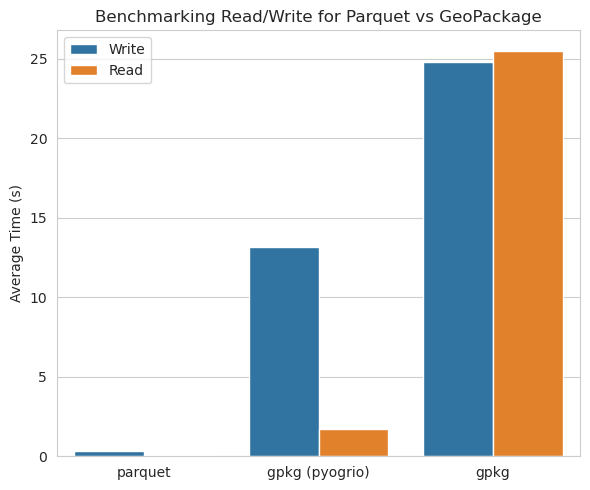

<Figure size 640x480 with 0 Axes>

In [34]:
# Display the results
plt.figure(figsize=(6, 5))
sns.barplot(x='Format', y='value', hue='variable', data=melted_df)
plt.xlabel('')
plt.ylabel('Average Time (s)')
plt.title('Benchmarking Read/Write for Parquet vs GeoPackage')
plt.legend()
plt.tight_layout()
plt.show()

plt.savefig(os.path.join(bench_dir, 'speed_results.png'))

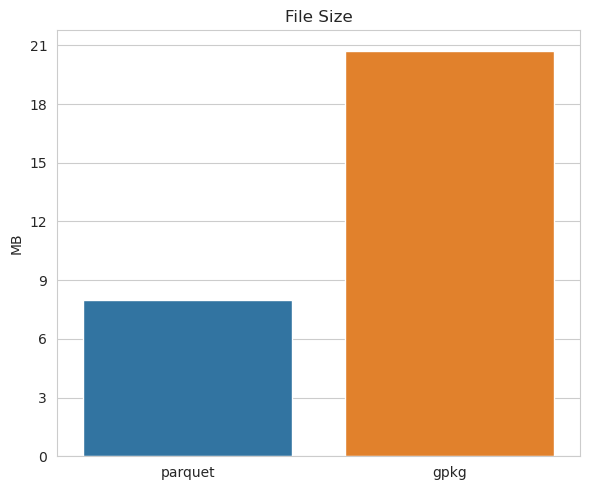

<Figure size 640x480 with 0 Axes>

In [31]:
# Get the file sizes
def get_file_size(file_path):
    return os.path.getsize(file_path) / 1024 / 1024  # Convert to MB

parquet_file_size = get_file_size(os.path.join(bench_dir, 'test.parquet'))
gpkg_file_size = get_file_size(os.path.join(bench_dir, 'test.gpkg'))

# Create DataFrame to store results
size_results = {
    'Format': ['parquet', 'gpkg'],
    'MB': [parquet_file_size, gpkg_file_size]
}
size_df = pd.DataFrame(size_results)

plt.figure(figsize=(6, 5))
ax = sns.barplot(x='Format', y='MB', data=size_df)

# Setting integer only y-axis
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('File Size')
plt.xlabel('')
plt.tight_layout()
plt.show()

plt.savefig(os.path.join(bench_dir, 'size_results.png'))
